# Experiments with NICE, Real NVP

## Target distribution

We will construct a distribution for two dimensional random variable $X$ that is a mixture of two distributions:
- $Z$ - a standard normal distribution
- $K$ - a uniform distribution on a rectangle

The X is as follows
$$
X = \delta Z + (1-\delta)K
$$
where $\delta$ is a random variable such that $P(\delta = 1) = p_{delta} = 1 - P(\delta = 0)$. So $p_{delta}$ is a probability of X being drawn from normal distrubution instead of from rectangle.
In this example I chose rectangle $[0.5, 3] \times [1,3]$. 

During this series of experiments we will estimate probability that both coordinates of $X$ is greater than $t$. We can calculate exact value of this probability as
$$
P(x_1>t)**2 p_{delta} + P(X \in K_t)*(1 - p_delta)
$$
where K_t is a rectangle restricted by $t$: $K_t \{(x_1, x_2) \in [a, b] \times [c, d]: x_1>t, x_2 >t\}$.

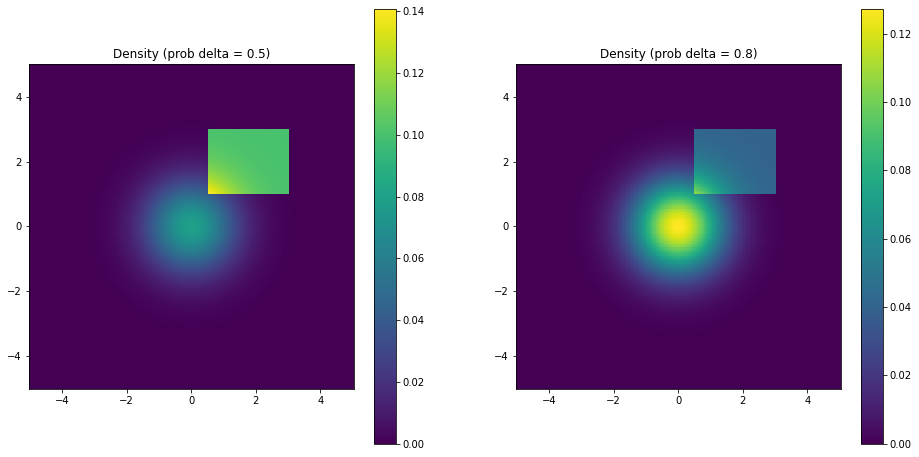

In [17]:
# Plot distribution
import matplotlib.pyplot as plt
from utils import *


middle_point = [0,0]
range_p = [5, 5]

grid_size = 200
xx, yy = torch.meshgrid(torch.linspace((middle_point[0]-range_p[0]), (middle_point[0]+range_p[0]), grid_size), torch.linspace((middle_point[1]-range_p[1]), (middle_point[1]+range_p[1]), grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)

K_intervals = torch.Tensor([[0.5, 1],
                        [3,3]])
nu = NormUnif(x_dim = 2, prob_delta=0.5, K_intervals=K_intervals)
prob = nu.calculate_pdf(zz)[:, None].reshape(200, 200)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
c=plt.pcolormesh(xx, yy, prob, shading='auto')
plt.colorbar(c)
plt.gca().set_aspect('equal', 'box')
plt.title("Density (prob delta = 0.8)")

K_intervals = torch.Tensor([[0.5, 1],
                        [3,3]])
nu = NormUnif(x_dim = 2, prob_delta=0.8, K_intervals=K_intervals)
prob = nu.calculate_pdf(zz)[:, None].reshape(200, 200)

plt.subplot(1, 2, 2)
c=plt.pcolormesh(xx, yy, prob, shading='auto')
plt.colorbar(c)
plt.gca().set_aspect('equal', 'box')
plt.title("Density (prob delta = 0.8)")
plt.show()

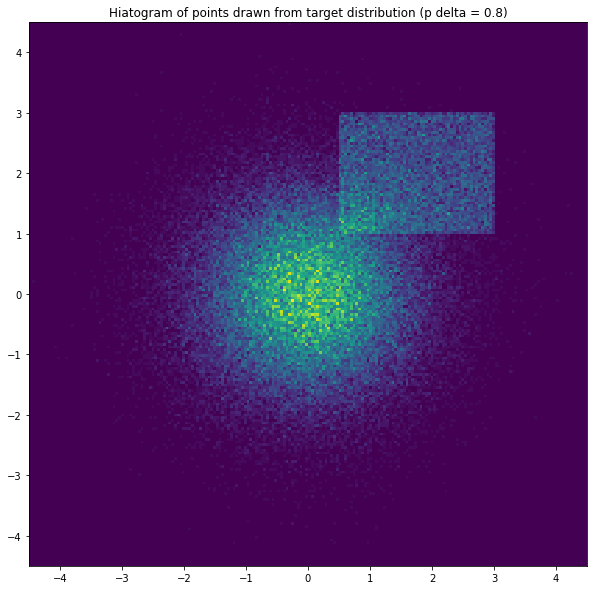

In [20]:
x_np = nu.forward(100000)[0].numpy()
plt.figure(figsize=(10, 10))
plt.hist2d(x_np[:, 0], x_np[:, 1], bins=200, range=[[-4.5, 4.5], [-4.5, 4.5]])
plt.title("Hiatogram of points drawn from target distribution (p delta = 0.8)")
plt.show()